In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
from pmdarima import auto_arima

In [11]:
df1 = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Time-Series-Data-Analysis\TSA_COURSE_NOTEBOOKS\Data\DailyTotalFemaleBirths.csv",
                 index_col=0, parse_dates=True)
df1.index_freq = 'D'
df1 = df1[:120]

In [14]:
df2 = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Time-Series-Data-Analysis\TSA_COURSE_NOTEBOOKS\Data\TradeInventories.csv",
                 index_col=0, parse_dates=True)
df2.index.freq = 'MS'

# ARMA

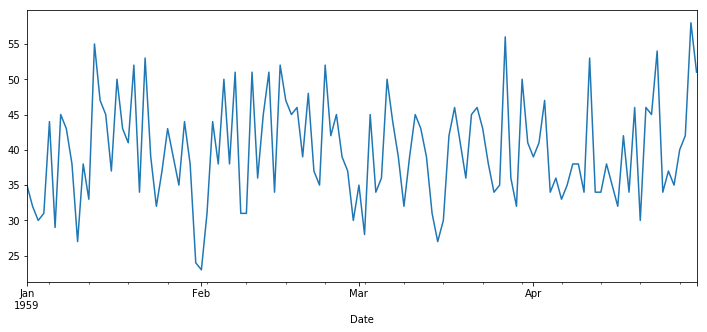

In [17]:
df1['Births'].plot(figsize=(12,5))

In [18]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [19]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [23]:
auto_arima(df1['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Thu, 02 Jan 2020   AIC                            823.489
Time:                        15:01:15   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [29]:
model = ARMA(train['Births'], order=(2,2))

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [30]:
results = model.fit()

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Thu, 02 Jan 2020   AIC                            627.809
Time:                        15:03:30   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [32]:
start = len(train)
end = len(train) + len(test) - 1

In [33]:
predictions = results.predict(start, end).rename('ARMA 2,2 Predictions')

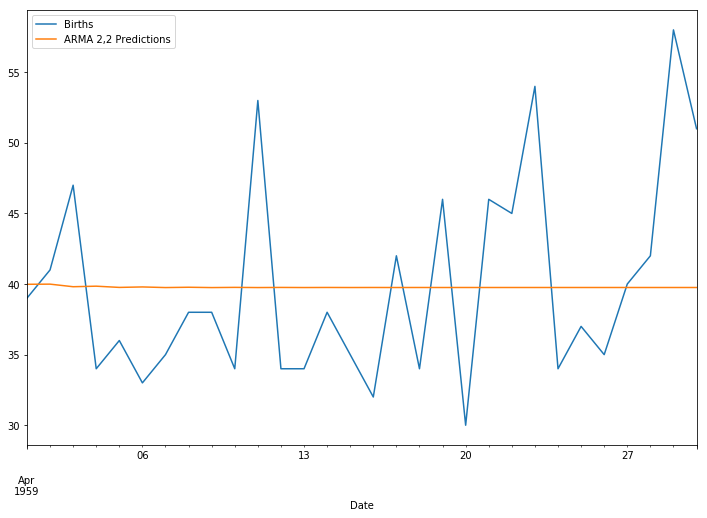

In [36]:
test['Births'].plot(figsize=(12, 8), legend=True)
predictions.plot(figsize=(12, 8), legend=True)

As shown in the Dicky Fuller test and viz we noted that there is no trend or seasonality in the data. It makes sense therefore that the ARMA model generates basically a moving average looking like the average value

We can't predict the noise but we can predict the mean

In [39]:
test.mean()

Births    39.833333
dtype: float64

In [40]:
predictions.mean()

39.777432665963275

# ARIMA

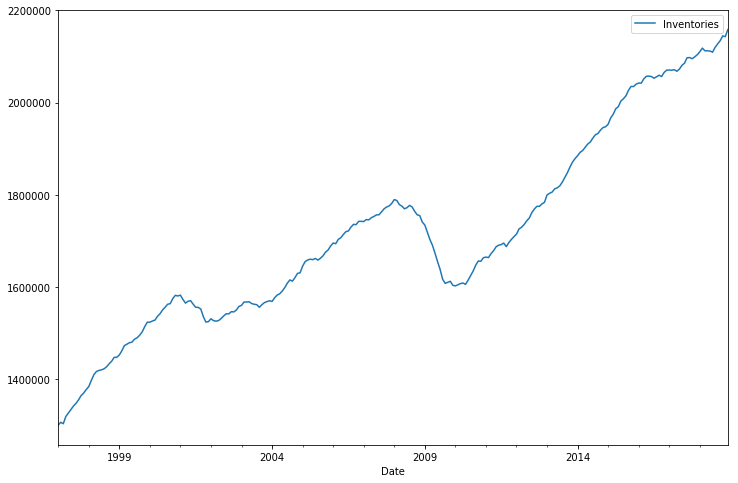

In [41]:
df2.plot(figsize=(12,8))

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

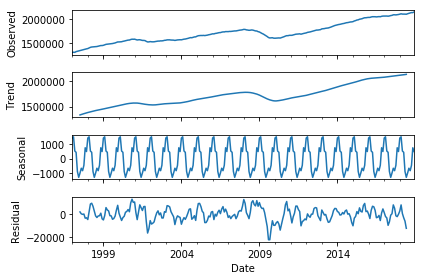

In [45]:
result = seasonal_decompose(df2['Inventories'], model='add')
result.plot();

There is a seasonal component but the order of magnitude is tiny in comparison... lets use ARIMA (no seasonality)

In [46]:
auto_arima(df2['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 02 Jan 2020   AIC                           5348.037
Time:                        15:12:52   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
adf_test(df2['Inventories'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.087684
p-value                   0.950652
# lags used               5.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [48]:
from statsmodels.tsa.statespace.tools import diff

In [49]:
df2['Diff_1'] = diff(df2['Inventories'], k_diff=1)

In [51]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


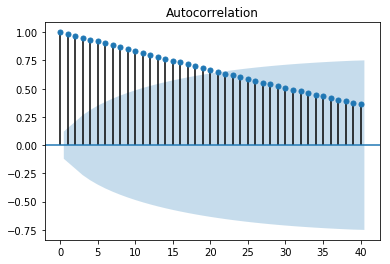

In [53]:
plot_acf(df2['Inventories'], lags=40);

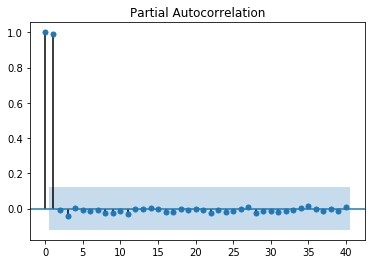

In [54]:
plot_pacf(df2['Inventories'], lags=40);

See the following article for determining AR and MA coefs in the classical way: https://people.duke.edu/~rnau/411arim3.htm

"Rule 6: If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding an AR term to the model. The lag at which the PACF cuts off is the indicated number of AR terms."

"AR and MA signatures: If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. You will probably find that an AR signature is commonly associated with positive autocorrelation at lag 1--i.e., it tends to arise in series which are slightly underdifferenced."

Basically the literature is reccomending AR = 1, I = 1, MA = 0

However - more practically - we will rely on Pyramid Arima to do the grid search

In [55]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0, max_p=2, max_q=2, seasonal=False, trace=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=5348.037, BIC=5355.181, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=5399.843, BIC=5410.560, Fit time=0.034 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=5350.241, BIC=5360.957, Fit time=0.042 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=5409.217, BIC=5412.789, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=5378.835, BIC=5393.124, Fit time=0.142 seconds
Total fit time: 0.239 seconds


In [56]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 02 Jan 2020   AIC                           5348.037
Time:                        15:26:04   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Note: since this course has been out ARIMA is no-longer reccomended from pyramid arima. Instead it will always reccomend some SARIMA(X) model as it's basically the same as ARIMA with a seasonal component set to 0

In [57]:
len(df2)

264

In [58]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [61]:
model = ARIMA(train['Inventories'], order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.017
Date:                Thu, 02 Jan 2020   AIC                           4980.789
Time:                        15:34:13   BIC                           4994.891
Sample:                    02-01-1997   HQIC                          4986.464
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3215.3509   1344.711      2.391      0.018     579.766    5850.936
ar.L1.D.Inventories     0.9025      0.039     22.995      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5579      0.079     -7.041      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7925           +0.0000j            1.7925            0.0000
-----------------------------------------------------------------------------
"""

In [62]:
start = len(train)
end = len(train) + len(test) - 1

In [64]:
# set typ=levels instead of linear so it comes back as the original data not the differenced version
predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA(1,1,1) Predictions')

In [65]:
predictions

2018-01-01    2.107152e+06
2018-02-01    2.110536e+06
2018-03-01    2.113903e+06
2018-04-01    2.117255e+06
2018-05-01    2.120593e+06
2018-06-01    2.123920e+06
2018-07-01    2.127236e+06
2018-08-01    2.130542e+06
2018-09-01    2.133839e+06
2018-10-01    2.137129e+06
2018-11-01    2.140411e+06
2018-12-01    2.143686e+06
Freq: MS, Name: ARIMA(1,1,1) Predictions, dtype: float64

In [66]:
test

,Inventories,Diff_1
Date,,
2018-01-01,2110158,6407.0
2018-02-01,2118199,8041.0
2018-03-01,2112427,-5772.0
2018-04-01,2112276,-151.0
2018-05-01,2111835,-441.0
2018-06-01,2109298,-2537.0
2018-07-01,2119618,10320.0
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0


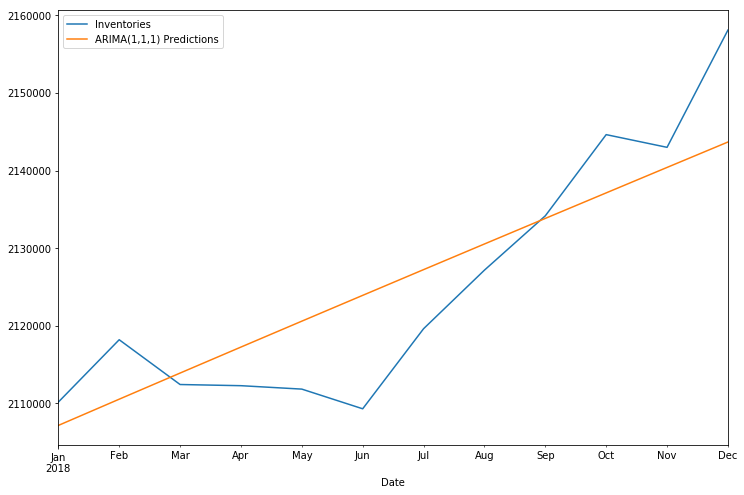

In [70]:
#train['Inventories'].plot(figsize=(12,8), legend=True)
test['Inventories'].plot(figsize=(12,8), legend=True)
predictions.plot(figsize=(12,8), legend=True)

In [71]:
from statsmodels.tools.eval_measures import rmse

In [72]:
error = rmse(test['Inventories'], predictions)

In [73]:
error

7778.520753561816

In [75]:
test['Inventories'].mean()

2125075.6666666665

In [76]:
predictions.mean()

2125516.8149927105

# Forecast into the Future

In [77]:
model = ARIMA(df2['Inventories'], order=(1,1,1))

In [78]:
results = model.fit()

In [81]:
fcast = results.predict(start=len(df2), end=len(df2)+11, typ='levels').rename('ARIMA (1,1,1) FORECAST')

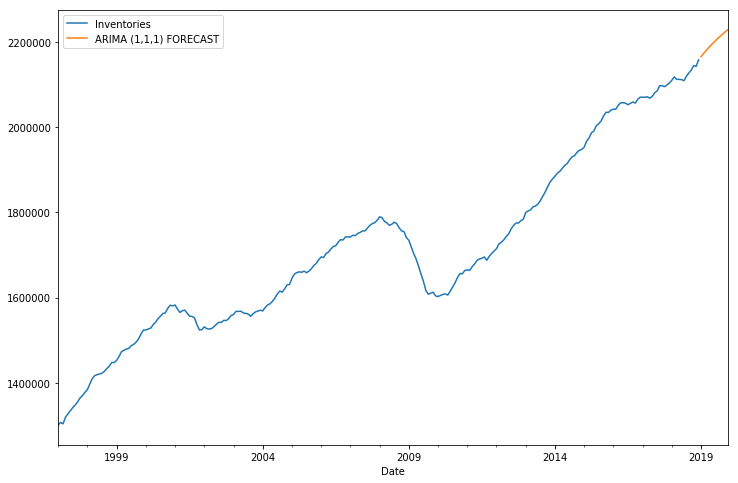

In [82]:
df2['Inventories'].plot(legend=True, figsize=(12, 8))
fcast.plot(legend=True)